In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from math import pi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as ss

### Prerequisite

For this assignment, we will be testing the our model and the GaussianNB model from scikit-learn on three datasets. In order for this notebook to run successfully, the three datasets will need to be saved in the same location as this notebook. The three datasets are as follows:
* penguin_af.csv
* diabetes.csv
* glassV2.csv

### 1. 

##### Implementing a class, "MyMCC" that implements Gaussian Naive Bayes. 
It contains the following methods "fit", "predict", "score", "compute_posterior", "prior_probability", "statistical_measurements" & "conditional_prob_calculation".

In [2]:
class MyMCC():
    def fit(self, input_var, output_var):
        # This function is used for fitting our model
    
        self.category = np.unique(output_var)
        self.length = len(self.category)
        self.rows = input_var.shape[0]
        self.statistical_measurements(input_var, output_var)
        self.prior_probability(input_var, output_var)
    
    def predict(self, input_var):
        # This function predicts the response value based on inputs
        
        predictions = [self.compute_posterior(w) for w in input_var.to_numpy()]
        return predictions
    
    def score(self, y_test, y_prediction):
        # This function returns the accuracy of a given test set
        # It mimics the score method that accompanies GaussianNB on scikit-learn
        
        score = np.sum(y_test == y_prediction) / len(y_test)
        return score
    
    def compute_posterior(self, c):
        # This function is used to calculate posterior probabilites.
        # This is the probability of an event occurring after taking into consideration new information.
        
        computation_list = []
        
        # The for loop below will calculate the posterior probability for each class
        for k in range(self.length):
            # Using the log to make it more numerically stable
            probability = np.log(self.probability[k]) 
            # Again, we use the log here to make it more numerically stable
            cond_prob = np.sum(np.log(self.conditional_prob_calculation(k, c))) 
            calc_post = probability + cond_prob
            computation_list.append(calc_post)
            
        # Below will return the class with the highest posterior probability
        return self.category[np.argmax(computation_list)]
    
    def prior_probability(self, input_var, output_var):

        # This function is used to calculate prior probabilities. 
        # This is probability of an event before new data is collected
        
        self.probability = (input_var.groupby(output_var).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.probability
    
    def statistical_measurements(self, input_var, output_var):
        # This function is used to calculate the mean and the variance for every column and converts it to a numpy array
        
        self.mean = input_var.groupby(output_var).apply(np.mean).to_numpy()
        self.variance = input_var.groupby(output_var).apply(np.var).to_numpy()
              
        return self.mean, self.variance
    
    def conditional_prob_calculation(self, predictor, values):     
        # Calculating the conditional probabilities using the equation given to us in the assignment outline
        
        mean = self.mean[predictor]
        variance = self.variance[predictor]
        np.seterr(divide = 'ignore') 
        
        # 1 divided by the sqrt of 2 * pi * variance
        first_equation = 1/(np.sqrt(2 * pi * variance))
        
        # Calculating the denominator
        denominator = 2 * variance

        # Calculating the numerator
        numerator = (values - mean) ** 2
        
        # Calculating the exponent
        exponent = np.exp(-(numerator/denominator))
        
        # Probability calculation
        prob_calc = first_equation * exponent

        return prob_calc

### Testing our function using Penguins dataset

In [3]:
# Reading in the penguins dataset
# Creating a df based off of the dataset
penguin_df = pd.read_csv("penguins_af.csv")

# Shuffling the dataset with sample
penguin_df = penguin_df.sample(frac=1, random_state=1).reset_index(drop=True)

# Checking the shape of the df
penguin_df.shape

(333, 9)

In [4]:
# X_penguin for the input data to be predicted on
X_penguin = penguin_df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] 
# y for the out/goal set
y_penguin = penguin_df['species']

In [5]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_penguin, y_penguin, test_size=0.3,random_state=20)

print("Original range is: ", penguin_df.shape[0])
print("Training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("Test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

Original range is:  333
Training range (70%):	 rows 0 to 233
Test range (30%): 	 rows 233 to 333


In [6]:
# Storing our function in variable for later use
MyMCC = MyMCC()

In [7]:
# Fitting our model with penguin train data
MyMCC.fit(X_train, y_train)

# Generating predictions and printing model accuracy
penguin_predictions = MyMCC.predict(X_test)
penguin_accuracy = MyMCC.score(y_test, penguin_predictions)
penguin_accuracy

0.97

In [8]:
print(f"Our model is {round(penguin_accuracy, 4)* 100}% accurate for the penguin dataset.")

Our model is 97.0% accurate for the penguin dataset.


### Testing our function using Diabetes dataset

In [9]:
# Reading in the diabetes dataset
# Creating a df based off of the dataset
diabetes_df = pd.read_csv("diabetes.csv")

# shuffle dataset with sample
diabetes_df = diabetes_df.sample(frac=1, random_state=1).reset_index(drop=True)

# Checking the shape of the df
diabetes_df.shape

(768, 9)

In [10]:
# X_diabetes for the input data to be predicted on
X_diabetes = diabetes_df[['preg', 'plas', 'pres', 'skin','insu','mass','pedi','age']]

# y_diabetes for the out/goal set
y_diabetes = diabetes_df['neg_pos']

In [11]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.3,random_state=20)

print("Original range is: ", diabetes_df.shape[0])
print("Training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("Test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

Original range is:  768
Training range (70%):	 rows 0 to 537
Test range (30%): 	 rows 537 to 768


In [12]:
# Fitting our model with diabetes train data
MyMCC.fit(X_train, y_train)

# Generating predictions and printing model accuracy
diabetes_predictions = MyMCC.predict(X_test)
diabetes_accuracy = MyMCC.score(y_test, diabetes_predictions)
diabetes_accuracy

0.7532467532467533

In [13]:
print(f"Our model is {round(diabetes_accuracy, 4)* 100}% accurate for the diabetes dataset.")

Our model is 75.32% accurate for the diabetes dataset.


### Testing our function using Glassv2 dataset

In [14]:
# Reading in the GlassV2 dataset
# Creating a df based off of the dataset
glassV2_df = pd.read_csv("glassV2.csv")

# shuffle dataset with sample
glassV2_df = glassV2_df.sample(frac=1, random_state=1).reset_index(drop=True)

# Checking the shape of the df
glassV2_df.shape

(205, 10)

In [15]:
# X_glass for the input data to be predicted on
X_glass = glassV2_df[['RI', 'Na', 'Mg', 'Al','Si','K','Ca','Ba','Fe']]

# y_glass for the out/goal set
y_glass = glassV2_df['Type']

In [16]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_glass, y_glass, test_size=0.3,random_state=20)

print("Original range is: ", glassV2_df.shape[0])
print("Training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("Test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

Original range is:  205
Training range (70%):	 rows 0 to 143
Test range (30%): 	 rows 143 to 205


In [17]:
# Fitting our model with glass train data
MyMCC.fit(X_train, y_train)

# Generating predictions and printing model accuracy
glass_predictions = MyMCC.predict(X_test)
glass_accuracy = MyMCC.score(y_test, glass_predictions)
glass_accuracy

0.4032258064516129

In [18]:
print(f"Our model is {round(glass_accuracy, 4)* 100}% accurate for the glass dataset.")

Our model is 40.32% accurate for the glass dataset.


The accuracy of our model is not great for this dataset, we will attempt to improve this accuracy.
To do this, we will find out the most important features in the glass dataset and refit our model using only these important features.
To find the most important features, we will implement the <b> Permutation feature importance model </b> from sklearn.

##### Implementing Permutation feature importance on the Glass Dataset

In [19]:
# For use in the implementation of permutation feature importance.
from sklearn.naive_bayes import GaussianNB

In [20]:
GaussianNB = GaussianNB()

In [21]:
features = ['RI', 'Na', 'Mg', 'Al','Si','K','Ca','Ba','Fe']

X_train, X_test, y_train, y_test = train_test_split(X_glass, y_glass, test_size=0.2)

GaussianNB.fit(X_train, y_train)

imps = permutation_importance(GaussianNB, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

1. Ba (0.053659)
2. Al (0.048780)
3. Na (0.004878)
4. K (0.000000)
5. Fe (-0.009756)
6. Mg (-0.029268)
7. Si (-0.029268)
8. RI (-0.073171)
9. Ca (-0.082927)


##### Implementing Cramer's V, a measure of correlation, based on Pearson’s Chi-Square statistic to further investigate feature importance

In [22]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [23]:
trainingSubset = pd.concat([X_train, y_train], axis=1)
# Creating a matrix to see the relationship between features using the cramers function above
matrix = [[cramers_v(trainingSubset[column], trainingSubset[column2])for column2 in trainingSubset] for column in trainingSubset]

In [24]:
# Selecting the columns of the training set 
trainingSubsetColumns = trainingSubset.columns

# Making a dataframe of the matrix above
matrix_correlation = pd.DataFrame(matrix, columns=trainingSubsetColumns, index=trainingSubsetColumns)

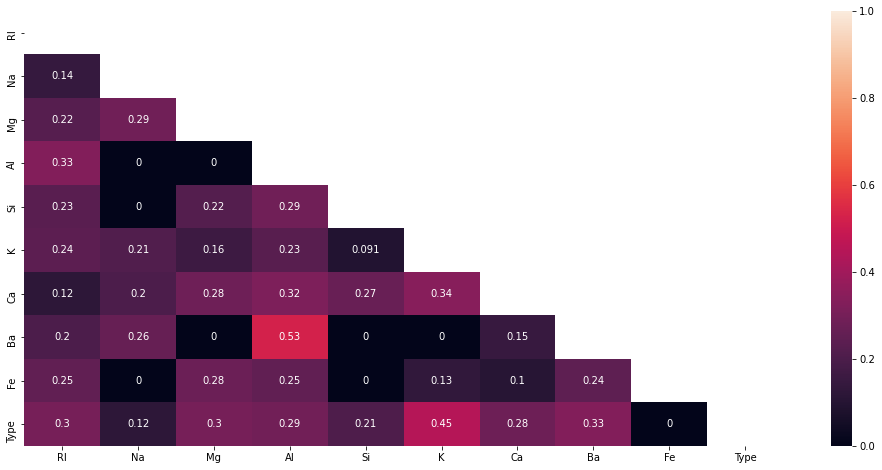

In [25]:
# Visualising the correlation between features
# We will now generate a mask for the upper triangle
mask = np.zeros_like(matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (17,8))
sn.heatmap(matrix_correlation, annot=True, mask=mask, vmax = 1)
plt.show()

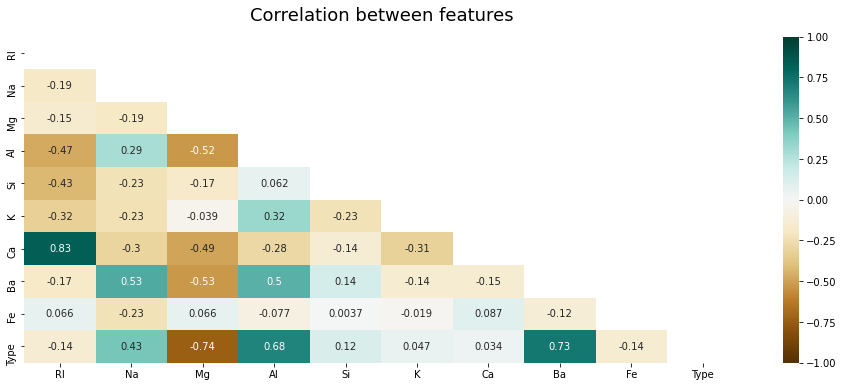

In [26]:
# Visualising of the correlation between  features
trainingSubset = pd.concat([X_train, y_train], axis=1)
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(trainingSubset.corr(), dtype=np.bool))
heatmap = sn.heatmap(trainingSubset.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation between features', fontdict={'fontsize':18}, pad=16);

### Restesting our function using Glassv2 dataset using specific features

In [27]:
# X_glass for the input data to be predicted on. Using important features as discovered from Permutation feature importance
X_glass = glassV2_df[['K', 'Al', 'Fe']]

# y_glass for the out/goal set
y_glass = glassV2_df['Type']

In [28]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_glass, y_glass, test_size=0.3,random_state=20)

print("Original range is: ", glassV2_df.shape[0])
print("Training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("Test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

Original range is:  205
Training range (70%):	 rows 0 to 143
Test range (30%): 	 rows 143 to 205


In [29]:
# Fitting our model with glass train data
MyMCC.fit(X_train, y_train)

# Generating predictions and printing model accuracy
glass_predictions = MyMCC.predict(X_test)
glass_accuracy = MyMCC.score(y_test, glass_predictions)
glass_accuracy

0.532258064516129

In [30]:
print(f"Using important features, our model is now {round(glass_accuracy, 4)* 100}% accurate for the glass dataset.\nThis is a much better result than previously attained.")

Using important features, our model is now 53.23% accurate for the glass dataset.
This is a much better result than previously attained.


## 2. Testing the performance of my implementation against the GaussianNB implementation in scikit-learn

### Testing GaussianNB implemention in scikit-learn on Penguins dataset

We have the penguin dataset's X and y values from the testing of our model, defined as X_penguin and y_penguin.
This means we can start from the splitting of the dataset into train and test data. 

In [31]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_penguin, y_penguin, test_size=0.3,random_state=20)

print("Original range is: ", penguin_df.shape[0])
print("Training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("Test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

Original range is:  333
Training range (70%):	 rows 0 to 233
Test range (30%): 	 rows 233 to 333


In [32]:
# Fitting GaussianNB with penguin train data
GaussianNB.fit(X_train, y_train)

# Generating predictions and printing model accuracy
penguin_pred = GaussianNB.predict(X_test)
penguin_GaussianScore = GaussianNB.score(X_test, y_test)
penguin_GaussianScore

0.97

In [33]:
print(f"The GaussianNB model is {round(penguin_GaussianScore, 4)* 100}% accurate for the penguin dataset.")

The GaussianNB model is 97.0% accurate for the penguin dataset.


###### Plotting the predictions of my model vs the predictions of the GaussianNB implementation in scikit-learn on the Penguin dataset

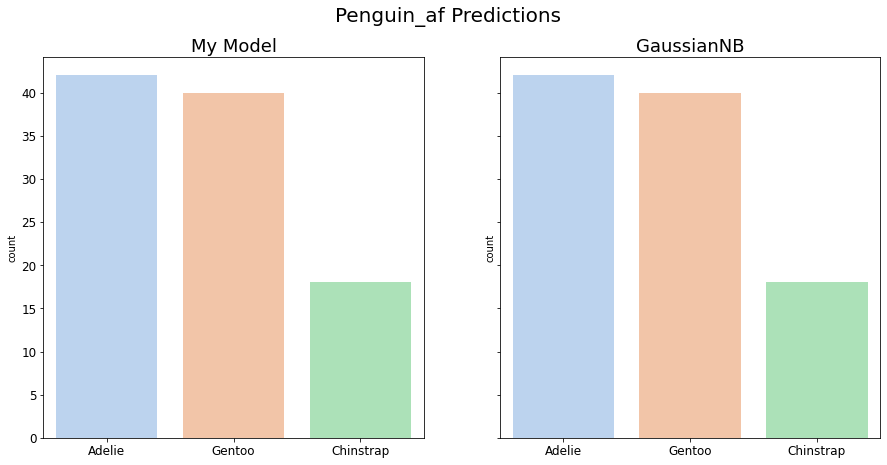

In [34]:
# Storing our predictions and GaussianNB model predictions in separate dataframes
ModelPred_df = pd.DataFrame(data=penguin_predictions, columns=['My Model Predictions'])
GaussianNBPred_df = pd.DataFrame(data=penguin_pred, columns=['GaussianNB Predictions'])
    
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,7))
        
sn.countplot(x='My Model Predictions', data=ModelPred_df, ax=ax[0], palette='pastel', alpha=0.8)
sn.countplot(x='GaussianNB Predictions', data=GaussianNBPred_df, ax=ax[1], palette='pastel', alpha=0.8)


fig.suptitle('Penguin_af Predictions', fontsize=20)

ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
ax[0].set_title("My Model", fontsize=18)
ax[1].set_title("GaussianNB", fontsize=18)
ax[0].set(xlabel=None)
ax[1].set(xlabel=None)
plt.show()

### Testing GaussianNB implemention in scikit-learn on Diabetes dataset

We have the diabetes dataset's X and y values from the testing of our model, defined as X_diabetes and y_diabetes. This means we can start from the splitting of the dataset into train and test data.

In [35]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.3,random_state=20)

print("Original range is: ", diabetes_df.shape[0])
print("Training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("Test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

Original range is:  768
Training range (70%):	 rows 0 to 537
Test range (30%): 	 rows 537 to 768


In [36]:
# Fitting GaussianNB with diabetes train data
GaussianNB.fit(X_train, y_train)

# Generating predictions and printing model accuracy
diabetes_pred = GaussianNB.predict(X_test)
diabetes_GaussianScore = GaussianNB.score(X_test, y_test)
diabetes_GaussianScore

0.7532467532467533

In [37]:
print(f"The GaussianNB model is {round(diabetes_GaussianScore, 4)* 100}% accurate for the diabetes dataset.")

The GaussianNB model is 75.32% accurate for the diabetes dataset.


###### Plotting the predictions of my model vs the predictions of the GaussianNB implementation in scikit-learn on the Diabetes dataset

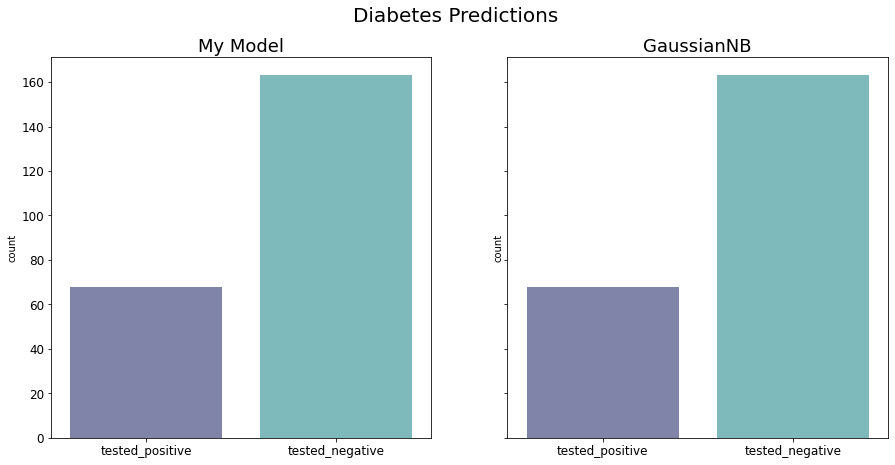

In [38]:
# Storing our predictions and GaussianNB model predictions in separate dataframes
ModelPred_df = pd.DataFrame(data=diabetes_predictions, columns=['My Model Predictions'])
GaussianNBPred_df = pd.DataFrame(data=diabetes_pred, columns=['GaussianNB Predictions'])
    
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,7))
        
sn.countplot(x='My Model Predictions', data=ModelPred_df, ax=ax[0], palette='mako', alpha=0.7)
sn.countplot(x='GaussianNB Predictions', data=GaussianNBPred_df, ax=ax[1], palette='mako', alpha=0.7)


fig.suptitle('Diabetes Predictions', fontsize=20)

ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
ax[0].set_title("My Model", fontsize=18)
ax[1].set_title("GaussianNB", fontsize=18)
ax[0].set(xlabel=None)
ax[1].set(xlabel=None)
plt.show()

### Testing GaussianNB implemention in scikit-learn on the GlassV2 dataset

We have the glassV2 dataset's X and y values from the testing of our model, defined as X_glass and y_glass. 
We will be using the improved X_glass and y_glass values after we have implemented Permutation feature importance and Cramer's V to find our best performing features.
We can start from the splitting of the dataset into train and test data.

In [39]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_glass, y_glass, test_size=0.3,random_state=20)

print("Original range is: ", glassV2_df.shape[0])
print("Training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("Test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

Original range is:  205
Training range (70%):	 rows 0 to 143
Test range (30%): 	 rows 143 to 205


In [40]:
# Fitting GaussianNB with glassV2 train data
GaussianNB.fit(X_train, y_train)

# Generating predictions and printing model accuracy
glass_pred = GaussianNB.predict(X_test)
glass_GaussianScore = GaussianNB.score(X_test, y_test)
glass_GaussianScore

0.532258064516129

In [41]:
print(f"The GaussianNB model is {round(glass_GaussianScore, 4)* 100}% accurate for the glassV2 dataset.")

The GaussianNB model is 53.23% accurate for the glassV2 dataset.


###### Plotting the predictions of my model vs the predictions of the GaussianNB implementation in scikit-learn on the GlassV2 dataset

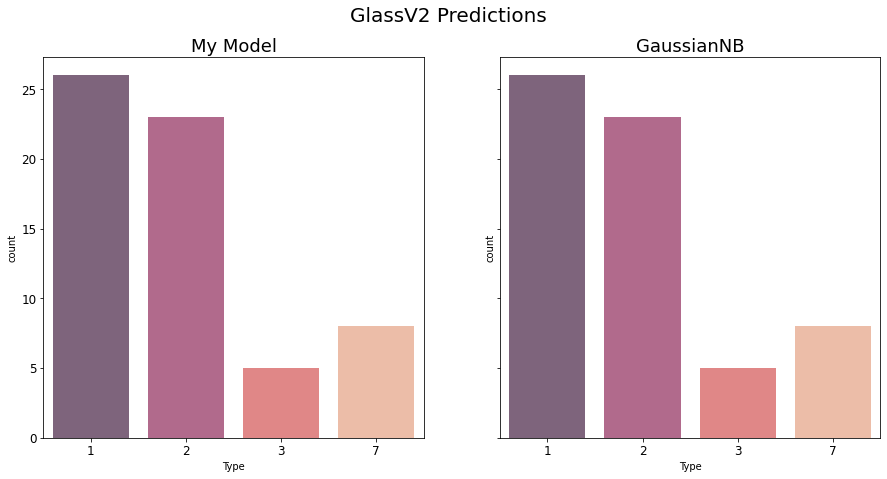

In [42]:
# Storing our predictions and GaussianNB model predictions in separate dataframes
ModelPred_df = pd.DataFrame(data=glass_predictions, columns=['Type'])
GaussianNBPred_df = pd.DataFrame(data=glass_pred, columns=['Type'])
    
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,7))
        
sn.countplot(x='Type', data=ModelPred_df, ax=ax[0], palette='rocket', alpha=0.7)
sn.countplot(x='Type', data=GaussianNBPred_df, ax=ax[1], palette='rocket', alpha=0.7)


fig.suptitle('GlassV2 Predictions', fontsize=20)

ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
ax[0].set_title("My Model", fontsize=18)
ax[1].set_title("GaussianNB", fontsize=18)

plt.show()

### Plotting Accuracy between my model and GaussianNB for every dataset

In [43]:
# Generating a list of each Accuracy score for my model and GaussianNB
# Converting that list to a percentage and rounding to 2 decimal places for plotting

MyMCCAccuracy = [penguin_accuracy, diabetes_accuracy, glass_accuracy]
MyMCCAccuracyPercentage = [round(my_num*100, 2) for my_num in MyMCCAccuracy]

GaussianNBAccuracy = [penguin_GaussianScore, diabetes_GaussianScore, glass_GaussianScore]
GaussianNBAccuracyPercentage = [round(sk_num*100, 2) for sk_num in GaussianNBAccuracy]


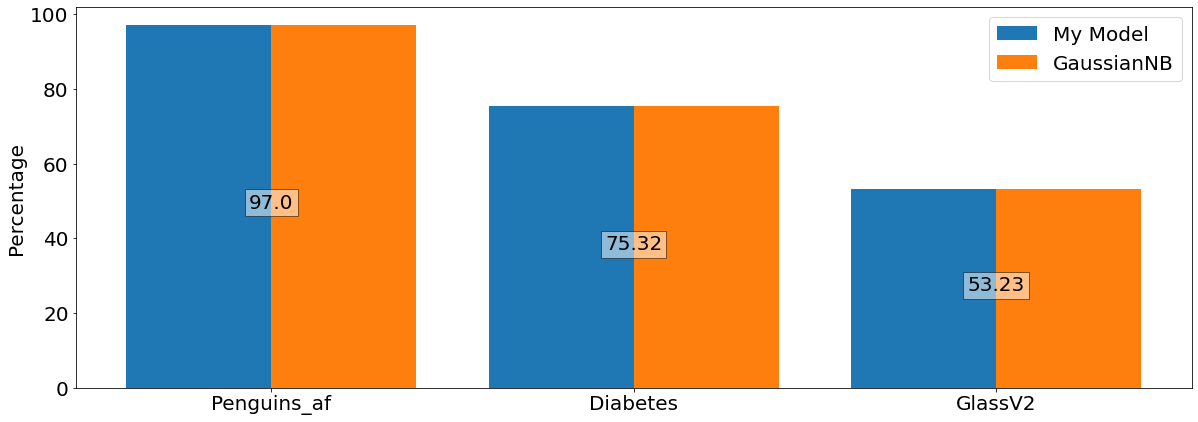

In [44]:
# Giving the plot the model accuracy data
x = np.arange(3)
y1 = MyMCCAccuracyPercentage
y2 = GaussianNBAccuracyPercentage
width = 0.4

plt.rcParams["figure.figsize"] = (20,7)
plt.rcParams.update({'font.size': 20})

# Function to add labels to the grouped barcharts
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha = 'center',
                  bbox = dict(facecolor = 'white', alpha = .5))
    
# Plotting the accuracy in a grouped barchart 
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)

plt.xticks(x, ['Penguins_af', 'Diabetes', 'GlassV2'])
plt.ylabel("Percentage")
plt.legend(['My Model', 'GaussianNB'])
addlabels(x, y1)

plt.show()